Print versions of modules

In [35]:
import pandas as pd
import numpy as np
import matplotlib
import sys

print("Python version:", sys.version)
print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
print("matplotlib version:", matplotlib.__version__)

Python version: 3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:20:11) [MSC v.1938 64 bit (AMD64)]
pandas version: 2.2.2
numpy version: 1.26.4
matplotlib version: 3.9.2


## Part 1: Data Cleaning & Preprocessing Tasks

### Fetch the data

In [39]:
df = pd.read_csv("C:/Users/kamiq/Downloads/MultiIndex_Timeseries_Dataset.csv", parse_dates = ["Date"])
df.head(10)

,City,Date,Temp,Humidity,Pressure,Wind,CO2,PM2.5,Noise,Light,Ozone,Rainfall
0,CityB,2018-08-16,0.478020,13.306499,22.314587,39.658232,NaN,51.346729,73.567719,80.348201,NaN,87.624049
1,CityB,2019-11-27,18.584651,NaN,33.770786,32.214960,46.008123,59.581071,58.997977,69.846452,79.426542,87.362012
2,CityC,2019-09-24,7.467846,27.985627,12.593919,32.192372,47.733442,63.086253,72.942468,77.381181,90.166851,94.041566
3,CityB,2019-11-24,9.100836,9.604854,24.574073,30.553996,47.323005,52.458826,NaN,80.464928,90.971178,95.929491
4,CityB,2019-07-24,0.824326,16.763055,19.072325,33.299963,49.656261,54.350788,70.438617,68.302019,85.918394,95.329727
5,CityA,2018-03-10,5.760773,10.675104,32.438438,36.984125,51.129446,55.945517,62.632609,66.783067,83.443844,90.711137
6,CityB,2018-06-11,NaN,11.937116,25.133536,38.577322,37.534657,68.451329,67.642635,68.770812,78.124189,94.853751
7,CityC,2020-03-05,1.017823,22.060418,28.525737,27.366950,36.847690,49.823320,67.998561,70.942583,81.282703,93.879801
8,CityB,2019-03-10,-2.841857,19.930401,29.462974,31.159433,47.634159,52.977412,77.037433,NaN,91.433938,89.505957
9,CityB,2020-02-19,0.160830,3.651942,22.423173,38.540129,46.868874,45.605849,65.578582,NaN,94.784800,97.100746


### Check for missing values

In [42]:
df.isna().sum().to_frame()

,0
City,0
Date,0
Temp,154
Humidity,157
Pressure,152
Wind,156
CO2,155
PM2.5,151
Noise,153
Light,153


### 1. Create a monthly table showing the average CO2 level for each city.

In [46]:
monthly_co2 = df.copy()
monthly_co2["Month"] = monthly_co2["Date"].dt.to_period("M")
monthly_avg = monthly_co2.groupby(["Month", "City"])["CO2"].mean().reset_index()
monthly_avg 

,Month,City,CO2
0,2018-01,CityA,44.763872
1,2018-01,CityB,42.081966
2,2018-01,CityC,46.212507
3,2018-02,CityA,45.406891
4,2018-02,CityB,46.765993
...,...,...,...
94,2020-08,CityB,47.998412
95,2020-08,CityC,43.579875
96,2020-09,CityA,45.954673
97,2020-09,CityB,46.675940


### 2. Add a new column labeling each row with "High Pollution" if PM2.5 > 60 and Ozone > 85, otherwise "Low Pollution".

In [49]:
df["Pollution"] = np.where((df["PM2.5"] > 60) & (df["Ozone"] > 85), "High Pollution", "Low Pollution")
df

,City,Date,Temp,Humidity,Pressure,Wind,CO2,PM2.5,Noise,Light,Ozone,Rainfall,Pollution
0,CityB,2018-08-16,0.478020,13.306499,22.314587,39.658232,NaN,51.346729,73.567719,80.348201,NaN,87.624049,Low Pollution
1,CityB,2019-11-27,18.584651,NaN,33.770786,32.214960,46.008123,59.581071,58.997977,69.846452,79.426542,87.362012,Low Pollution
2,CityC,2019-09-24,7.467846,27.985627,12.593919,32.192372,47.733442,63.086253,72.942468,77.381181,90.166851,94.041566,High Pollution
3,CityB,2019-11-24,9.100836,9.604854,24.574073,30.553996,47.323005,52.458826,NaN,80.464928,90.971178,95.929491,Low Pollution
4,CityB,2019-07-24,0.824326,16.763055,19.072325,33.299963,49.656261,54.350788,70.438617,68.302019,85.918394,95.329727,Low Pollution
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,CityC,2019-10-04,NaN,14.550206,20.459789,28.587608,52.999998,59.562396,68.881930,NaN,92.257918,NaN,Low Pollution
3096,CityC,2019-11-13,-1.409758,17.990540,22.679964,42.425608,42.237774,55.412387,69.684171,79.466387,84.815935,95.197286,Low Pollution
3097,CityC,2019-06-21,9.486205,6.381040,30.292439,17.878205,55.037513,62.317295,58.141870,76.743930,75.671336,NaN,Low Pollution
3098,CityB,2018-03-28,5.404903,16.357302,31.354593,29.762254,50.924131,51.845525,71.962396,79.727500,78.406366,101.325141,Low Pollution


### 3. Top 5 common (Temp, Humidity) pairs

In [60]:
df2 = df.copy()
df2.fillna(0, inplace = True)
df2["Temp_int"] = df2["Temp"].round().astype(int)
df2["Humidity_int"] = df2["Humidity"].round().astype(int)
top_combos = df2.value_counts(["Temp_int", "Humidity_int"]).nlargest(5).reset_index(name="count")
top_combos 

,Temp_int,Humidity_int,count
0,0,12,23
1,0,14,22
2,0,11,20
3,0,20,20
4,7,15,19


### 4. For each city, compute the rank (descending) of average Rainfall per month.

In [65]:
df3 = df.copy()
df3["Month"] = df3["Date"].dt.to_period("M")
df_rain = df3.groupby(["City", "Month"])["Rainfall"].mean().reset_index()
df_rain["Rank"] = df_rain.groupby("City")["Rainfall"].rank(ascending=False, method="min")
df_rain

,City,Month,Rainfall,Rank
0,CityA,2018-01,94.075637,24.0
1,CityA,2018-02,94.485314,22.0
2,CityA,2018-03,96.318196,5.0
3,CityA,2018-04,92.682792,33.0
4,CityA,2018-05,95.706407,11.0
...,...,...,...,...
94,CityC,2020-05,94.087002,25.0
95,CityC,2020-06,96.205057,6.0
96,CityC,2020-07,94.715459,19.0
97,CityC,2020-08,96.355943,4.0


### 5. Create a pivot table where index = year, columns = city, and values = mean Pressure.

In [70]:
df4 = df.copy()
df4["Year"] = df4["Date"].dt.to_period("Y")
pressure_pivot = pd.pivot_table(df4, index="Year", columns="City", values="Pressure", aggfunc="mean")
pressure_pivot

City,CityA,CityB,CityC
Year,,,
2018,24.633218,25.265464,24.858998
2019,25.073673,25.011101,25.181663
2020,25.281302,25.418579,25.438180


### 6. Replace missing values in Light with the median for that city and month.

In [75]:
df5 = df.copy()
df5["Month"] = df5["Date"].dt.to_period("M")
group_medians = df5.groupby(["City", "Month"])["Light"].transform("median")
df5["Light"] = df5["Light"].fillna(group_medians)
df5

,City,Date,Temp,Humidity,Pressure,Wind,CO2,PM2.5,Noise,Light,Ozone,Rainfall,Pollution,Month
0,CityB,2018-08-16,0.478020,13.306499,22.314587,39.658232,NaN,51.346729,73.567719,80.348201,NaN,87.624049,Low Pollution,2018-08
1,CityB,2019-11-27,18.584651,NaN,33.770786,32.214960,46.008123,59.581071,58.997977,69.846452,79.426542,87.362012,Low Pollution,2019-11
2,CityC,2019-09-24,7.467846,27.985627,12.593919,32.192372,47.733442,63.086253,72.942468,77.381181,90.166851,94.041566,High Pollution,2019-09
3,CityB,2019-11-24,9.100836,9.604854,24.574073,30.553996,47.323005,52.458826,NaN,80.464928,90.971178,95.929491,Low Pollution,2019-11
4,CityB,2019-07-24,0.824326,16.763055,19.072325,33.299963,49.656261,54.350788,70.438617,68.302019,85.918394,95.329727,Low Pollution,2019-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,CityC,2019-10-04,NaN,14.550206,20.459789,28.587608,52.999998,59.562396,68.881930,77.526603,92.257918,NaN,Low Pollution,2019-10
3096,CityC,2019-11-13,-1.409758,17.990540,22.679964,42.425608,42.237774,55.412387,69.684171,79.466387,84.815935,95.197286,Low Pollution,2019-11
3097,CityC,2019-06-21,9.486205,6.381040,30.292439,17.878205,55.037513,62.317295,58.141870,76.743930,75.671336,NaN,Low Pollution,2019-06
3098,CityB,2018-03-28,5.404903,16.357302,31.354593,29.762254,50.924131,51.845525,71.962396,79.727500,78.406366,101.325141,Low Pollution,2018-03


## Part 2: Exploratory Data Analysis (EDA)

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df1 = df.copy()
df1["Month"] = df1["Date"].dt.to_period("M").dt.to_timestamp()
df1["Year"] = df1["Date"].dt.year

### 1. Visualize how Humidity levels vary between cities across all months.

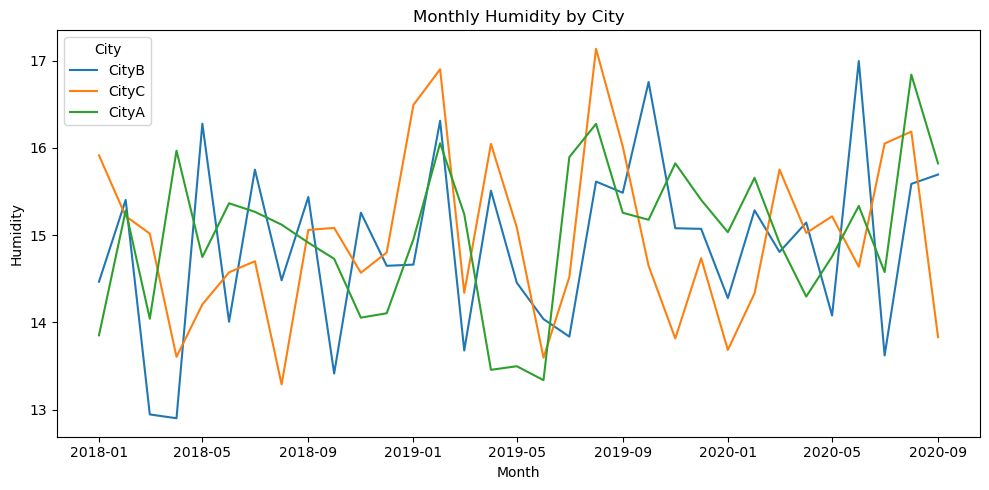

In [84]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df1, x="Month", y="Humidity", hue="City", errorbar=None)
plt.title("Monthly Humidity by City")
plt.tight_layout()
plt.show()

### 2. Show the relationship between CO2 and Noise, colored by city.

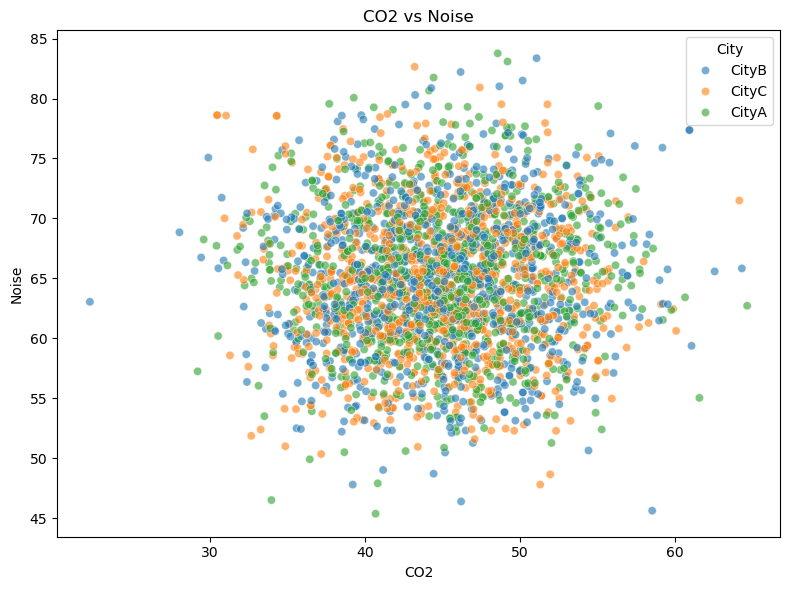

In [87]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1, x="CO2", y="Noise", hue="City", alpha=0.6)
plt.title("CO2 vs Noise")
plt.tight_layout()
plt.show()

### 3. Plot correlation matrix between all numeric variables (excluding date and city).

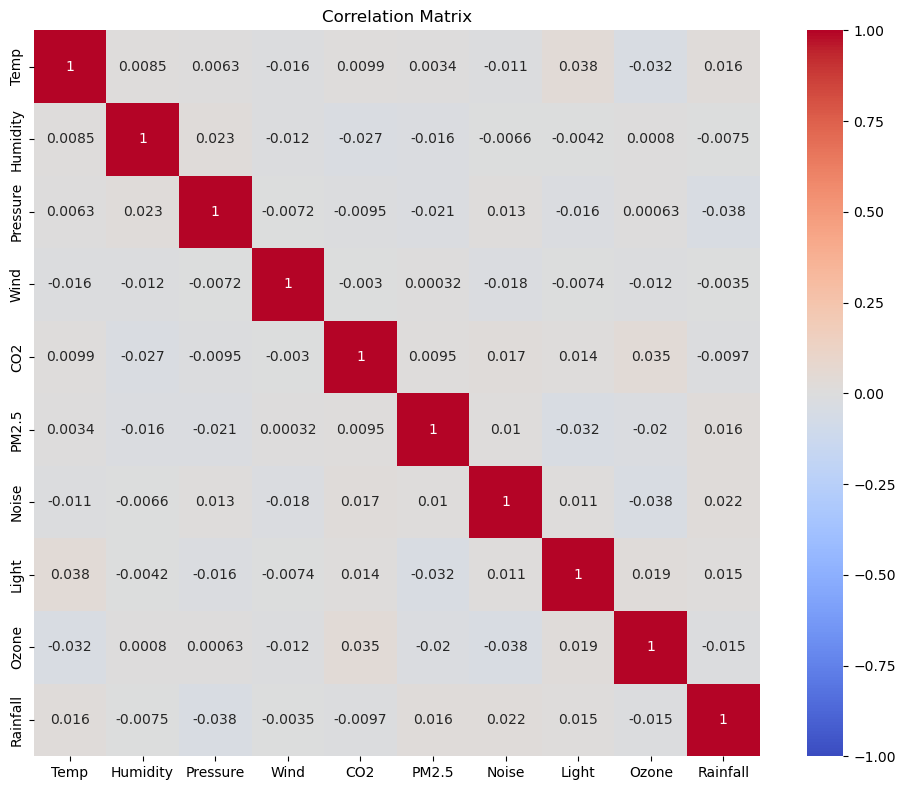

In [98]:
ncols = df.select_dtypes(include="number").columns
corr = df[ncols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

### 4. Create a visual to show outliers in Temp across the whole dataset.

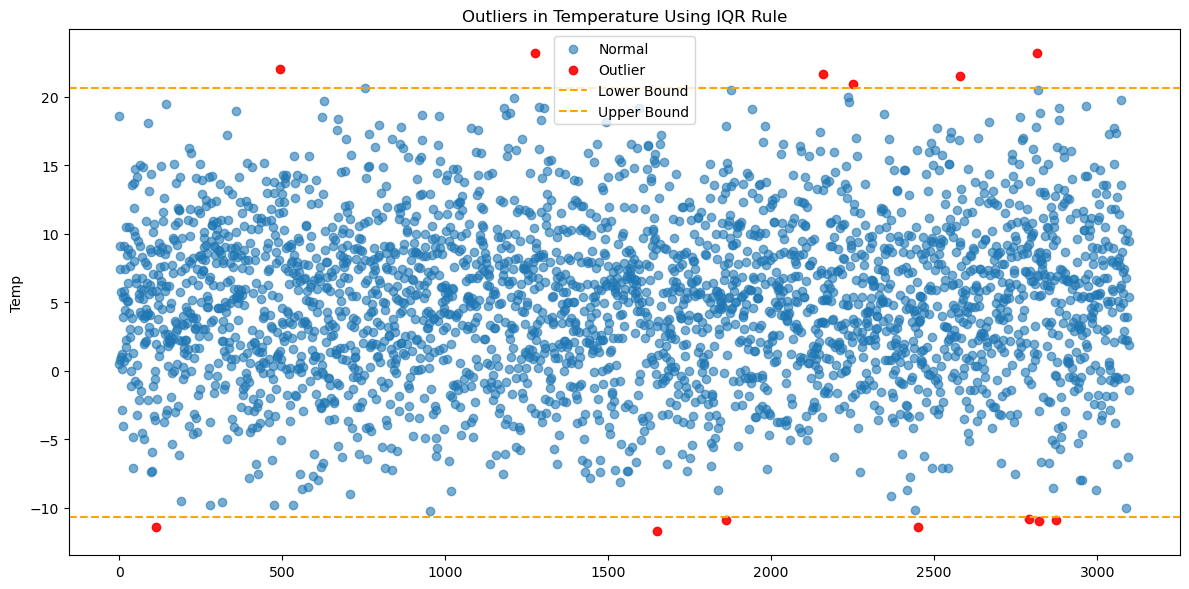

In [101]:
Q1 = df["Temp"].quantile(0.25)
Q3 = df["Temp"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
is_outlier = (df["Temp"] < lower_bound) | (df["Temp"] > upper_bound)

plt.figure(figsize=(12, 6))
plt.scatter(df.index[~is_outlier], df.loc[~is_outlier, "Temp"], label="Normal", alpha=0.6)
plt.scatter(df.index[is_outlier], df.loc[is_outlier, "Temp"], color="red", label="Outlier", alpha=0.9)
plt.axhline(lower_bound, color="orange", linestyle="--", label="Lower Bound")
plt.axhline(upper_bound, color="orange", linestyle="--", label="Upper Bound")
plt.ylabel("Temp")
plt.title("Outliers in Temperature Using IQR Rule")
plt.legend()
plt.tight_layout()
plt.show()

### 5. Plot the number of rows where PM2.5 > 70 for each year.

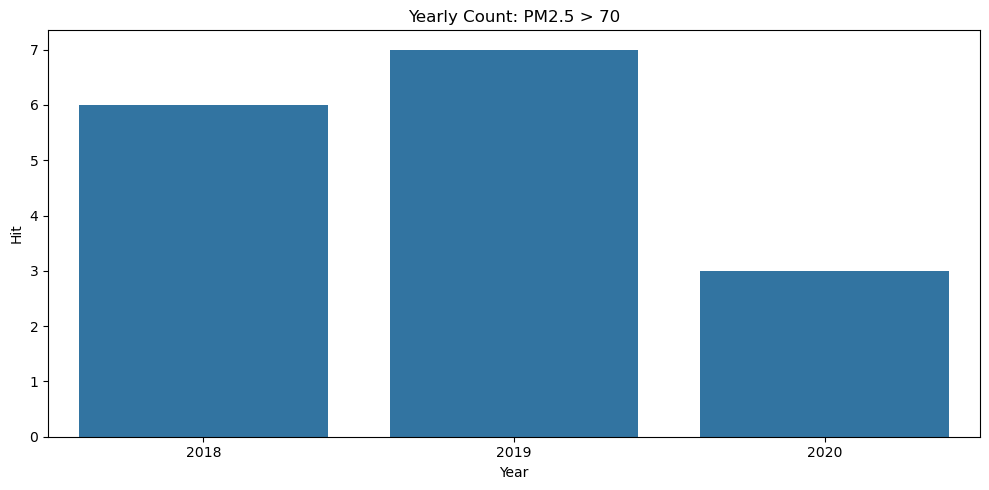

In [104]:
df1["Hit"] = (df1["PM2.5"] > 70).astype(int)
df2 = df1.groupby("Year")["Hit"].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(data=df2, x="Year", y="Hit")
plt.title("Yearly Count: PM2.5 > 70")
plt.tight_layout()
plt.show()

### 6. Compare the distribution of Wind speeds between CityA and CityB.

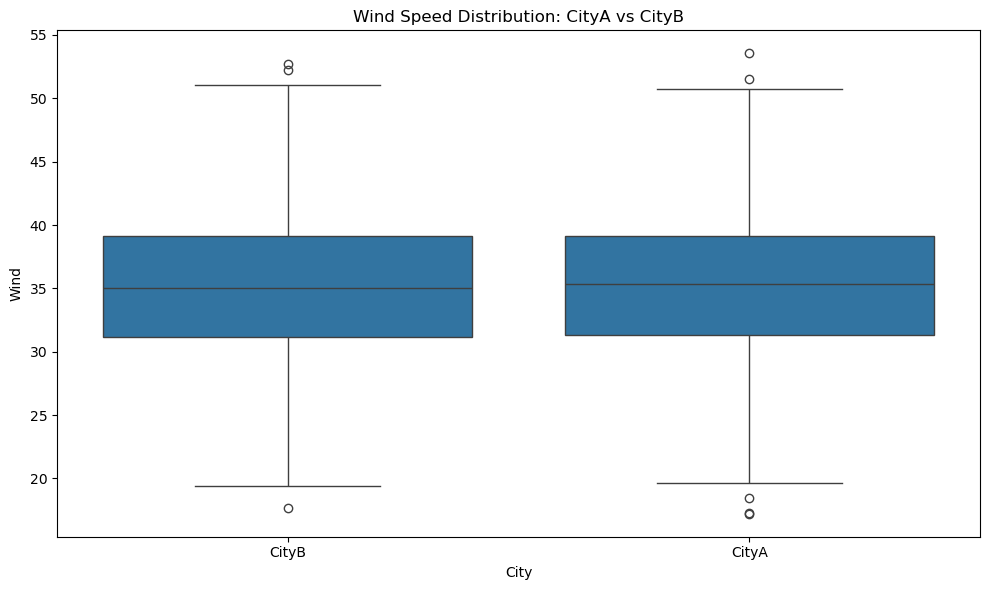

In [108]:
df2 = df1[df1["City"].isin(["CityA", "CityB"])]
plt.figure(figsize=(10, 6))
sns.boxplot(data=df2, x="City", y="Wind")
plt.title("Wind Speed Distribution: CityA vs CityB")
plt.tight_layout()
plt.show()

## Part 3: Predict Temperature

- Features: Humidity, Pressure, Wind, CO2, PM2.5, Noise, Light, Ozone, Rainfall

- Target: Temp

- Train/Test split: Sort by date, use 80% of rows for training, 20% for testing

- Models: LinearRegression, Ridge, RandomForestRegressor

- Metrics: RMSE, MAE, R2


### 1. Machine Learning

In [112]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Clean data
df1 = df.copy()
df1 = df1.dropna(subset=["Temp", "Humidity", "Pressure", "Wind", "CO2", "PM2.5", "Noise", "Light", "Ozone", "Rainfall"])
df1 = df1.sort_values("Date")

# Features and target
features = ["Humidity", "Pressure", "Wind", "CO2", "PM2.5", "Noise", "Light", "Ozone", "Rainfall"]
target = "Temp"
X = df1[features]
y = df1[target]

# Time-based split: 80% train / 20% test
split_idx = int(len(df1) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# Models and parameter grids
param_grids = {
    "LinearRegression": {},
    "Ridge": {"alpha": [0.1, 1.0, 10.0]},
    "RandomForest": {
        "n_estimators": [50, 100],
        "max_depth": [3, 5, 7]
    }
}

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "RandomForest": RandomForestRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    grid = GridSearchCV(model, param_grids[name], cv=3, scoring="r2")
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    results[name] = {
        "model": best_model,
        "y_pred": y_pred,
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred)
    }

# Evaluation table
metrics_df = pd.DataFrame({
    name: {
        "RMSE": r["RMSE"],
        "MAE": r["MAE"],
        "R2": r["R2"]
    }
    for name, r in results.items()
}).T

print(metrics_df)

                      RMSE       MAE        R2
LinearRegression  5.971381  4.774996 -0.005204
Ridge             5.971376  4.774992 -0.005203
RandomForest      5.997471  4.798729 -0.014007


In [123]:
# Of course a negative R2 means that the model is worse than the simple prediction by the mean

### 2. Visualization of Results

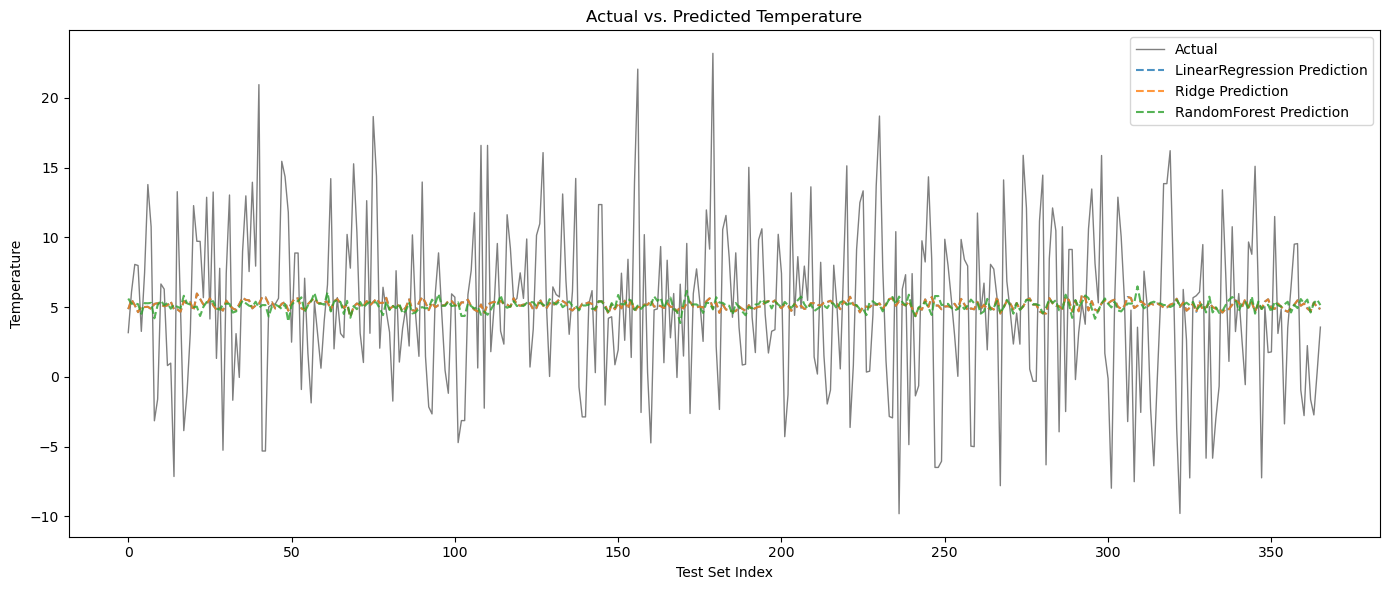

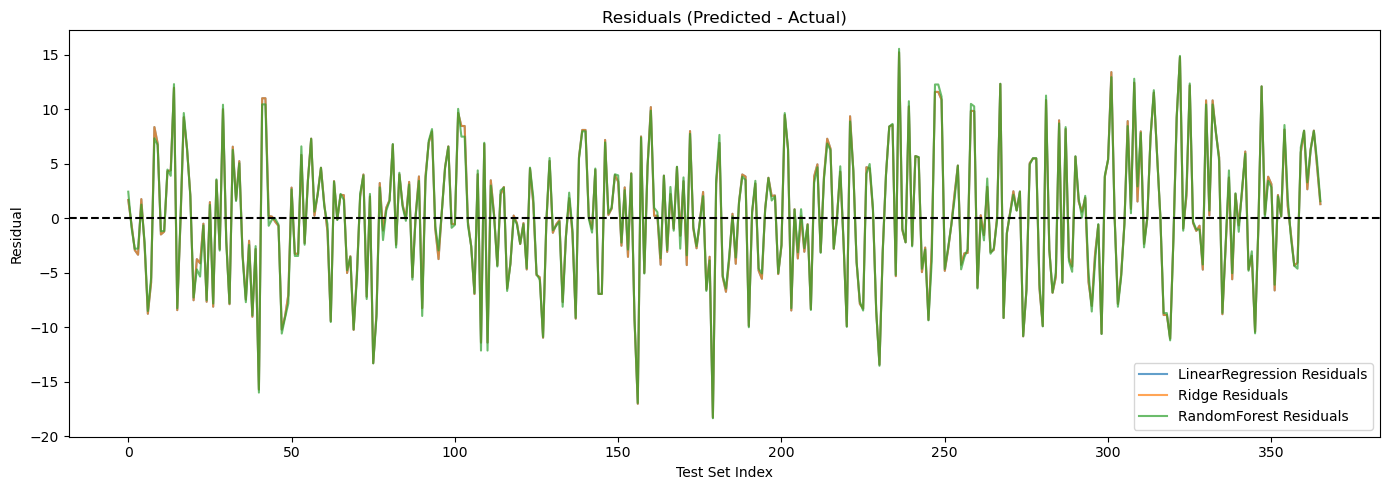

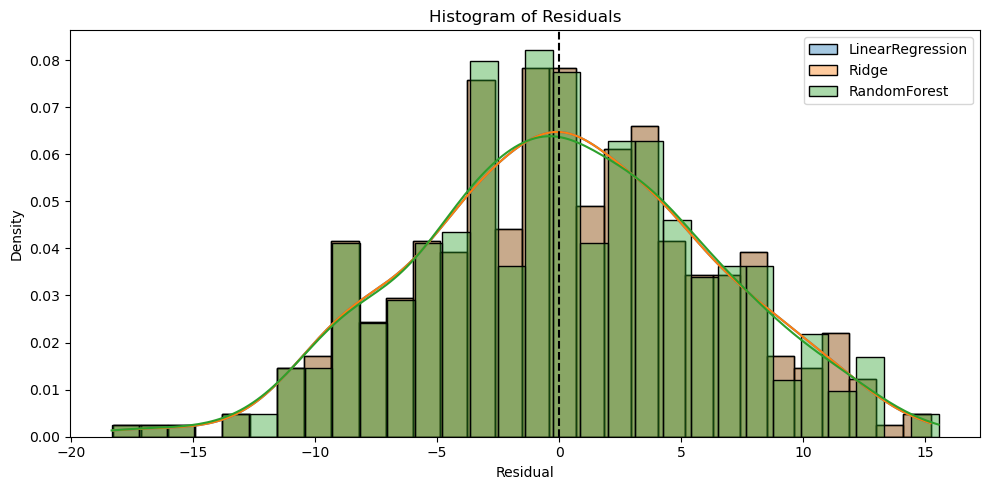

In [116]:
plt.figure(figsize=(14, 6))
plt.plot(y_test.values, label="Actual", color="black", linewidth=1, alpha=0.5)
for name, r in results.items():
    plt.plot(r["y_pred"], label=f"{name} Prediction", linestyle="--", alpha=0.8)
plt.title("Actual vs. Predicted Temperature")
plt.xlabel("Test Set Index")
plt.ylabel("Temperature")
plt.legend()
plt.tight_layout()
plt.show()

# Residuals
plt.figure(figsize=(14, 5))
for name, r in results.items():
    residuals = r["y_pred"] - y_test.values
    plt.plot(residuals, label=f"{name} Residuals", alpha=0.7)
plt.axhline(0, color="black", linestyle="--")
plt.title("Residuals (Predicted - Actual)")
plt.xlabel("Test Set Index")
plt.ylabel("Residual")
plt.legend()
plt.tight_layout()
plt.show()

# Residual histogram
plt.figure(figsize=(10, 5))
for name, r in results.items():
    residuals = r["y_pred"] - y_test.values
    sns.histplot(residuals, kde=True, label=name, stat="density", bins=30, alpha=0.4)
plt.axvline(0, color="black", linestyle="--")
plt.title("Histogram of Residuals")
plt.xlabel("Residual")
plt.legend()
plt.tight_layout()
plt.show()